
## Evaluating the performance of a hybrid power plant with P2X using HyDesign

In this notebook we will evaluate a hybrid power plant design in a specific location.

A hybrid power plant design consists on selecting the following parameters:

**Wind Plant design:**

1. Number of wind turbines in the wind plant [-] (`Nwt`)
2. Wind power installation density [MW/km2] (`wind_MW_per_km2`): This parameter controls how closely spaced are the turbines, which in turns affect how much wake losses are present.

**PV Plant design:**

3. Solar plant power capacity [MW] (`solar_MW`)

**Battery Storage design:**

4. Battery power [MW] (`b_P`)
5. Battery energy capacity in hours [MWh] (`b_E_h `): Battery storage capacity in hours of full battery power (`b_E = b_E_h * b_P `). 
6. Cost of battery power fluctuations in peak price ratio [-] (`cost_of_batt_degr`): This parameter controls how much penalty is given to do ramps in battery power in the HPP operation.

**Electrolyzer design:**

5. Electrolyzer capacity [MW] (`ptg_MW`)

##
**Imports**

Install hydesign if needed.
Import basic libraries. 
Import HPP model assembly class.
Import the examples file path.

In [ ]:
# Install hydesign if needed
import importlib
if not importlib.util.find_spec("hydesign"):
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git   

In [1]:
 
import os
import time
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydesign.hpp_assembly_P2X import hpp_model_P2X
from hydesign.examples import examples_filepath

##
**Specifying the site**

Hydesign, provides example data from several sites in India and Europe. 

The site coordinates (longitude, latitude, and altitude) are given in `examples_sites.csv`.

In [2]:
examples_sites = pd.read_csv(f'{examples_filepath}examples_sites.csv', index_col=0)
examples_sites

##
**Select a site to run**

In [3]:
name = 'Denmark_good_wind'

ex_site = examples_sites.loc[examples_sites.name == name]

longitude = ex_site['longitude'].values[0]
latitude = ex_site['latitude'].values[0]
altitude = ex_site['altitude'].values[0]

In [4]:
input_ts_fn = examples_filepath+ex_site['input_ts_fn'].values[0]

input_ts = pd.read_csv(input_ts_fn, index_col=0, parse_dates=True)

required_cols = [col for col in input_ts.columns if 'WD' not in col]
input_ts = input_ts.loc[:,required_cols]
input_ts

In [5]:
sim_pars_fn = examples_filepath+ex_site['sim_pars_fn'].values[0]

with open(sim_pars_fn) as file:
    sim_pars = yaml.load(file, Loader=yaml.FullLoader)

print(sim_pars_fn)    
sim_pars

/home/gupta/hydesign/hydesign/examples/Europe/hpp_pars.yml


{'G_MW': 300,
 'year': '2012',
 'N_life': 25,
 'wind_turbine_cost': 640000,
 'wind_civil_works_cost': 260000,
 'wind_fixed_onm_cost': 12600,
 'wind_variable_onm_cost': 1.35,
 'wpp_efficiency': 1.0,
 'd_ref': 145,
 'hh_ref': 100,
 'p_rated_ref': 5.0,
 'solar_PV_cost': 110000,
 'solar_hardware_installation_cost': 100000,
 'solar_inverter_cost': 20000,
 'solar_fixed_onm_cost': 4500,
 'pv_deg_per_year': 0.005,
 'land_use_per_solar_MW': 0.01226,
 'tracking': 'No',
 'battery_energy_cost': 45000,
 'battery_power_cost': 16000,
 'battery_BOP_installation_commissioning_cost': 18000,
 'battery_control_system_cost': 4500,
 'battery_energy_onm_cost': 0,
 'battery_depth_of_discharge': 0.9,
 'battery_charge_efficiency': 0.98,
 'battery_price_reduction_per_year': 0.1,
 'peak_hr_quantile': 0.9,
 'n_steps_in_LoH': 20,
 'min_LoH': 0.7,
 'n_full_power_hours_expected_per_day_at_peak_price': 0,
 'price_H2': 2,
 'storage_eff': 1,
 'ptg_deg': 0.99,
 'hhv': 39.3,
 'water_consumption': 9.4,
 'electrolyzer_capex

## 
**Initializing the HPP model**

Initialize the HPP model (hpp_model class) with the coordinates and the necessary input files.

In [6]:
hpp = hpp_model_P2X(
        latitude,
        longitude,
        altitude,
        num_batteries = 1,
        work_dir = './',
        sim_pars_fn = sim_pars_fn,
        input_ts_fn = input_ts_fn,
)

longitude = 8.594398
latitude = 56.227322
altitude = 85.0


##
### Evaluating the HPP model


Design:
---------------
clearance [m]: 10.000
sp [m2/W]: 353.000
p_rated [MW]: 2.000
Nwt: 145.000
wind_MW_per_km2 [MW/km2]: 5.020
solar_MW [MW]: 50.000
surface_tilt [deg]: 27.350
surface_azimuth [deg]: 194.380
DC_AC_ratio: 1.220
b_P [MW]: 9.000
b_E_h [h]: 8.000
cost_of_battery_P_fluct_in_peak_price_ratio: 3.340
ptg_MW [MW]: 100.000


NPV_over_CAPEX: 0.090
NPV [MEuro]: 29.802
IRR: 0.066
LCOE [Euro/MWh]: 31.318
CAPEX [MEuro]: 330.666
OPEX [MEuro]: 11.200
penalty lifetime [MEuro]: 0.000
AEP [GWh]: 1155.963
GUF: 0.440
annual H2 [kg]: 1610665.418
grid [MW]: 300.000
wind [MW]: 290.000
solar [MW]: 50.000
PtG [MW]: 100.000
Battery Energy [MWh]: 72.000
Battery Power [MW]: 9.000
Total curtailment [GWh]: 0.000
Awpp [km2]: 57.769
Rotor diam [m]: 84.934
Hub height [m]: 52.467
Number_of_batteries: 1.000

exec. time [min]: 0.2549054265022278


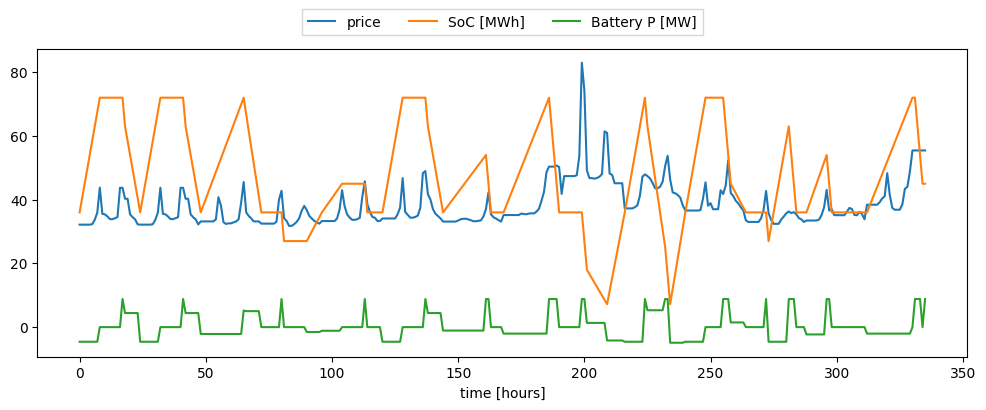

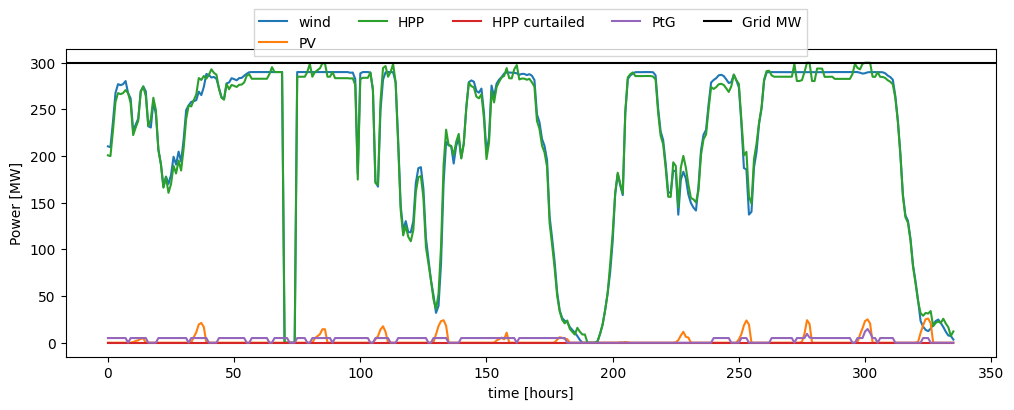

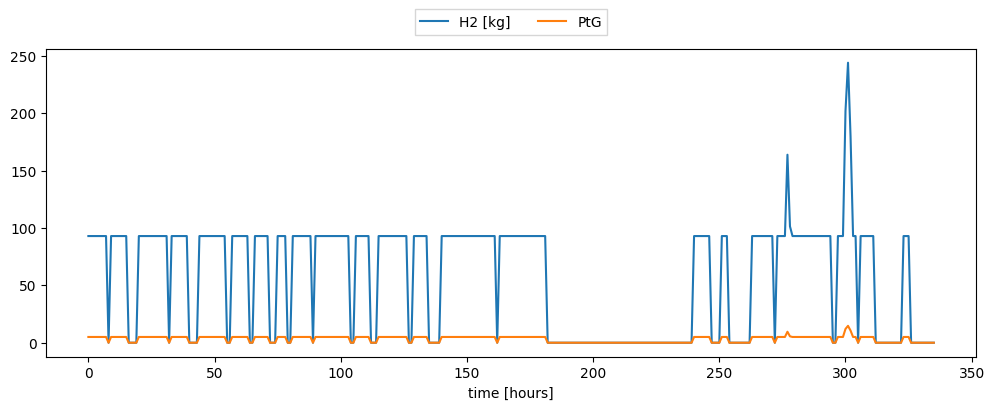

In [7]:
start = time.time()

clearance = 10
sp = 353
p_rated = 2        
Nwt = 145
wind_MW_per_km2 = 5.02
solar_MW = 50
surface_tilt = 27.35
surface_azimuth = 194.38
DC_AC_ratio = 1.22
b_P = 9
b_E_h  = 8
cost_of_batt_degr = 3.34
ptg_MW = 100

x = [clearance, sp, p_rated, Nwt, wind_MW_per_km2, solar_MW, \
surface_tilt, surface_azimuth, DC_AC_ratio, b_P, b_E_h , cost_of_batt_degr, ptg_MW]

outs = hpp.evaluate(*x)

hpp.print_design(x, outs)

end = time.time()
print(f'exec. time [min]:', (end - start)/60 )

##
### Plot the HPP operation

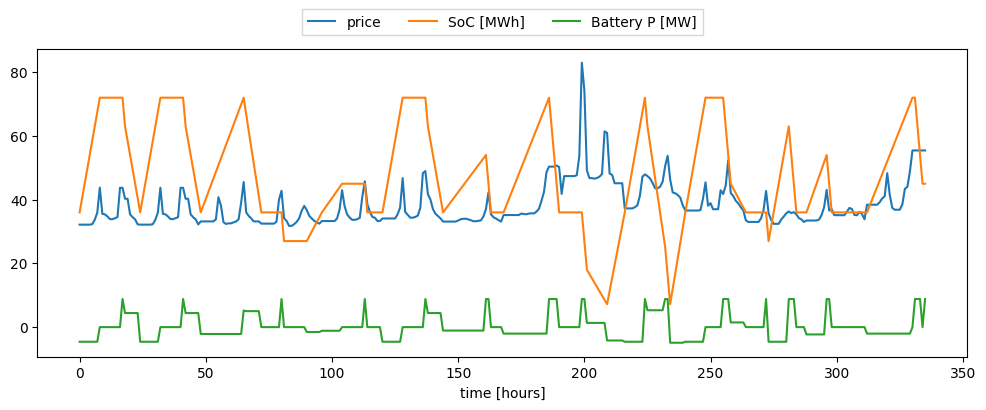

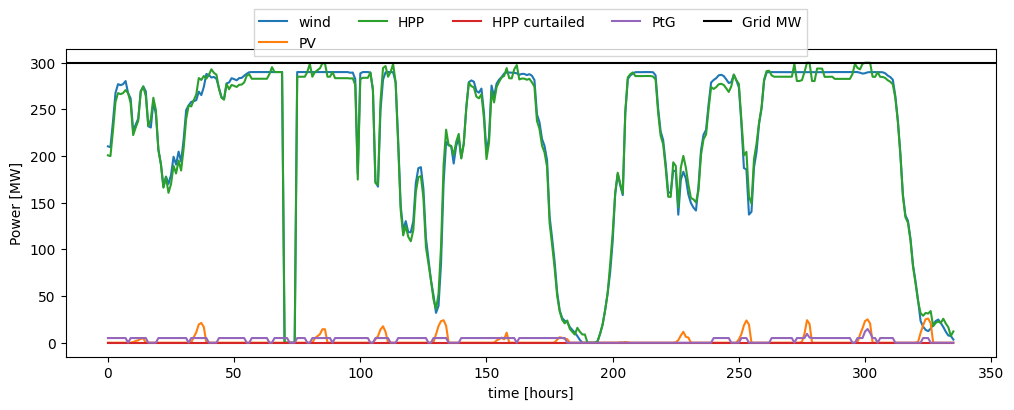

In [8]:
b_E_SOC_t = hpp.prob.get_val('ems_P2X.b_E_SOC_t')
b_t = hpp.prob.get_val('ems_P2X.b_t')
price_t = hpp.prob.get_val('ems_P2X.price_t')

wind_t = hpp.prob.get_val('ems_P2X.wind_t')
solar_t = hpp.prob.get_val('ems_P2X.solar_t')
hpp_t = hpp.prob.get_val('ems_P2X.hpp_t')
hpp_curt_t = hpp.prob.get_val('ems_P2X.hpp_curt_t')
P_ptg_t = hpp.prob.get_val('ems_P2X.P_ptg_t')
grid_MW = hpp.prob.get_val('ems_P2X.G_MW')

n_days_plot = 14
plt.figure(figsize=[12,4])
plt.plot(price_t[:24*n_days_plot], label='price')
plt.plot(b_E_SOC_t[:24*n_days_plot], label='SoC [MWh]')
plt.plot(b_t[:24*n_days_plot], label='Battery P [MW]')
plt.xlabel('time [hours]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fancybox=0, shadow=0)

plt.figure(figsize=[12,4])
plt.plot(wind_t[:24*n_days_plot], label='wind')
plt.plot(solar_t[:24*n_days_plot], label='PV')
plt.plot(hpp_t[:24*n_days_plot], label='HPP')
plt.plot(hpp_curt_t[:24*n_days_plot], label='HPP curtailed')
plt.plot(P_ptg_t[:24*n_days_plot], label='PtG')
plt.axhline(grid_MW, label='Grid MW', color='k')
plt.xlabel('time [hours]')
plt.ylabel('Power [MW]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=5, fancybox=0, shadow=0)
